**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со  stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from collections import Counter
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle #- код работает только без него
# я закоментил когда влез в PEP8 и он сказал что все хорошо


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.data = np.array(X, float)
        if self.algorithm == 'kd_tree':
            self.KDTree = KDTree(self.data)
        self.data2 = np.sum(self.data ** 2, axis=1).reshape(1, -1)
        self.cls = np.array(y, int)
        self.classes = list(set(y))
        self.lens = len(self.classes)

    def _predict(self, X):
        if self.algorithm == 'brute':
            X2 = np.array(X, float)
            distances = np.sqrt(self.data2 - 2 * X2 @ self.data.T +
                                np.sum(X2 ** 2, axis=1).reshape(-1, 1))
            buf = np.argpartition(distances, range(self.n_neighbors),
                                  axis=1)[:, :self.n_neighbors]
            near = self.cls[buf]
        elif self.algorithm == 'kd_tree':
            X2 = np.array(X, float)
            buf = self.KDTree.query(X2, k=self.n_neighbors)[1]
            near = self.cls[buf[:, :self.n_neighbors]]
        return near

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_proba(self, X):
        near = self._predict(X)
        answer = np.zeros((X.shape[0], self.lens), float)
        for i in range(X.shape[0]):
            for every in Counter(near[i]).most_common(self.lens):
                answer[i][every[0]] = every[1]
        return answer / self.n_neighbors

    def score(self, X, y):
        return np.sum(y == self.predict(X)) / len(y)

    def set_params(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 6 ms, total: 6 ms
Wall time: 5.93 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 844 µs, sys: 107 µs, total: 951 µs
Wall time: 1.09 ms


In [8]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 3.09 ms, total: 3.09 ms
Wall time: 3.24 ms


array([1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 3.55 ms, sys: 0 ns, total: 3.55 ms
Wall time: 3.74 ms


array([1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2.53 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.05 ms, sys: 0 ns, total: 2.05 ms
Wall time: 2.23 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [12]:
%time clf.score(X_test, y_test)

CPU times: user 3.26 ms, sys: 0 ns, total: 3.26 ms
Wall time: 3.42 ms


0.8666666666666667

In [13]:
%time my_clf.score(X_test, y_test)

CPU times: user 0 ns, sys: 2.12 ms, total: 2.12 ms
Wall time: 2.29 ms


0.8666666666666667

Задание 3

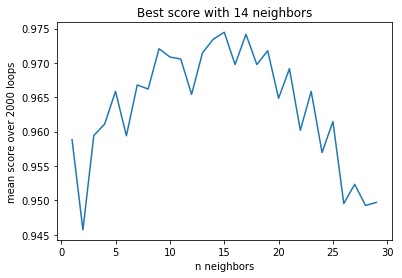

In [14]:
rez = []
loops = 2000
my_clf = MyKNeighborsClassifier(n_neighbors = 2)
for i in range(1,30):
    bufer = []
    for j in range(loops):
        X_train, X_test, y_train, y_test = (
            train_test_split(
                iris.data, iris.target, test_size=0.1, stratify=iris.target
            )
        )
        my_clf.set_params(n_neighbors = i)
        my_clf.fit(X_train, y_train)
        bufer.append(my_clf.score(X_test, y_test))
    rez.append(np.mean(bufer))
rez = np.array(rez)
mx = np.argmax(rez)
plt.plot(range(1,30), rez)
plt.xlabel("n neighbors")
plt.ylabel(f"mean score over {loops} loops")
plt.title(f"Best score with {mx} neighbors")
plt.show()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

/home/viliar/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/viliar/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 16.3 ms, sys: 2 µs, total: 16.3 ms
Wall time: 16.8 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 355 ms, sys: 627 ms, total: 983 ms
Wall time: 992 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 33.5 s, sys: 1.15 s, total: 34.6 s
Wall time: 18.5 s


array([9., 7., 2., 1., 9., 1., 4., 2., 4., 0., 0., 6., 7., 5., 0., 9., 9.,
       3., 1., 2., 2., 8., 4., 0., 7., 7., 6., 9., 0., 1., 7., 9., 4., 7.,
       4., 3., 2., 7., 4., 1., 2., 7., 8., 7., 0., 5., 7., 0., 1., 7., 2.,
       8., 7., 6., 0., 4., 4., 9., 0., 3., 4., 0., 0., 5., 1., 9., 9., 4.,
       1., 9., 6., 9., 8., 6., 5., 9., 3., 8., 9., 9., 7., 6., 8., 1., 4.,
       0., 7., 8., 1., 3., 6., 7., 0., 3., 2., 1., 1., 4., 0., 7., 4., 5.,
       9., 6., 8., 6., 5., 6., 6., 6., 8., 9., 3., 3., 0., 9., 0., 0., 2.,
       9., 8., 7., 9., 3., 0., 5., 0., 3., 2., 0., 5., 2., 7., 5., 1., 0.,
       7., 6., 2., 2., 6., 9., 1., 7., 7., 8., 4., 9., 9., 4., 8., 0., 4.,
       8., 1., 6., 1., 6., 6., 9., 8., 5., 1., 7., 7., 1., 4., 1., 5., 9.,
       6., 6., 2., 0., 4., 5., 0., 4., 9., 7., 4., 2., 9., 0., 5., 2., 1.,
       1., 7., 3., 0., 0., 1., 5., 3., 9., 8., 8., 1., 9., 1., 7., 8., 0.,
       8., 3., 0., 7., 5., 3., 5., 3., 0., 4., 4., 4., 3., 9., 5., 1., 9.,
       2., 4., 3., 0., 3.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 33.7 s, sys: 1.67 s, total: 35.4 s
Wall time: 19.3 s


array([9, 7, 2, 1, 9, 1, 4, 2, 4, 0, 0, 6, 7, 5, 0, 9, 9, 3, 1, 2, 2, 8,
       4, 0, 7, 7, 6, 9, 0, 1, 7, 9, 4, 7, 4, 3, 2, 7, 4, 1, 2, 7, 8, 7,
       0, 5, 7, 0, 1, 7, 2, 8, 7, 6, 0, 4, 4, 9, 0, 3, 4, 0, 0, 5, 1, 9,
       9, 4, 1, 9, 6, 9, 8, 6, 5, 9, 3, 8, 9, 9, 7, 6, 8, 1, 4, 0, 7, 8,
       1, 3, 6, 7, 0, 3, 2, 1, 1, 4, 0, 7, 4, 5, 9, 6, 8, 6, 5, 6, 6, 6,
       8, 9, 3, 3, 0, 9, 0, 0, 2, 9, 8, 7, 9, 3, 0, 5, 0, 3, 2, 0, 5, 2,
       7, 5, 1, 0, 7, 6, 2, 2, 6, 9, 1, 7, 7, 8, 4, 9, 9, 4, 8, 0, 4, 8,
       1, 6, 1, 6, 6, 9, 8, 5, 1, 7, 7, 1, 4, 1, 5, 9, 6, 6, 2, 0, 4, 5,
       0, 4, 9, 7, 4, 2, 9, 0, 5, 2, 1, 1, 7, 3, 0, 0, 1, 5, 3, 9, 8, 8,
       1, 9, 1, 7, 8, 0, 8, 3, 0, 7, 5, 3, 5, 3, 0, 4, 4, 4, 3, 9, 5, 1,
       9, 2, 4, 3, 0, 3, 4, 3, 1, 1, 8, 4, 5, 1, 5, 9, 5, 9, 3, 4, 9, 1,
       5, 7, 4, 2, 4, 7, 2, 2, 8, 1, 1, 9, 6, 4, 4, 7, 2, 2, 1, 7, 3, 7,
       3, 2, 9, 4, 0, 9, 8, 5, 5, 4, 5, 3, 7, 6, 2, 9, 6, 0, 8, 2, 6, 5,
       3, 7, 6, 6, 4, 3, 4, 2, 9, 5, 8, 0, 3, 0, 1,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 33.5 s, sys: 1.15 s, total: 34.7 s
Wall time: 18.6 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 33.8 s, sys: 1.74 s, total: 35.5 s
Wall time: 19.5 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9542857142857143

In [25]:
my_clf.score(X_test, y_test)

0.9542857142857143

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=mx, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=mx, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 2min 42s, sys: 1.21 s, total: 2min 43s
Wall time: 2min 43s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2min 44s, sys: 1.44 s, total: 2min 45s
Wall time: 2min 44s


In [30]:
%time clf.predict(X_test)

CPU times: user 4min 23s, sys: 69.8 ms, total: 4min 23s
Wall time: 4min 23s


array([5., 5., 0., 6., 8., 4., 0., 8., 3., 1., 7., 2., 3., 0., 5., 0., 7.,
       9., 8., 1., 6., 0., 2., 4., 7., 9., 8., 1., 2., 5., 3., 9., 0., 5.,
       2., 8., 2., 1., 1., 1., 1., 2., 4., 8., 1., 9., 9., 4., 4., 0., 8.,
       7., 3., 0., 0., 7., 5., 8., 7., 5., 8., 8., 6., 7., 0., 5., 6., 2.,
       0., 1., 3., 8., 2., 8., 3., 3., 4., 9., 2., 7., 1., 1., 6., 2., 5.,
       7., 9., 2., 0., 9., 2., 1., 2., 8., 0., 8., 7., 3., 1., 5., 1., 1.,
       2., 7., 5., 6., 0., 4., 3., 4., 7., 7., 3., 6., 1., 6., 9., 4., 6.,
       6., 9., 7., 5., 9., 0., 7., 4., 3., 7., 3., 3., 0., 5., 2., 0., 3.,
       5., 9., 9., 6., 1., 0., 7., 3., 7., 1., 8., 4., 2., 6., 2., 8., 9.,
       4., 1., 9., 6., 0., 2., 1., 4., 5., 8., 2., 3., 8., 8., 4., 5., 5.,
       6., 2., 8., 9., 9., 6., 2., 6., 3., 4., 5., 6., 1., 4., 9., 7., 0.,
       9., 7., 9., 5., 5., 9., 3., 5., 9., 1., 6., 5., 1., 7., 3., 2., 7.,
       2., 2., 1., 7., 6., 8., 1., 5., 1., 9., 4., 5., 3., 7., 1., 6., 8.,
       2., 7., 1., 2., 5.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 3min 27s, sys: 70.6 ms, total: 3min 27s
Wall time: 3min 28s


array([5, 5, 0, 6, 8, 4, 0, 8, 3, 1, 7, 2, 3, 0, 5, 0, 7, 9, 8, 1, 6, 0,
       2, 4, 7, 9, 8, 1, 2, 5, 3, 9, 0, 5, 2, 8, 2, 1, 1, 1, 1, 2, 4, 8,
       1, 9, 9, 4, 4, 0, 8, 7, 3, 0, 0, 7, 5, 8, 7, 5, 8, 8, 6, 7, 0, 5,
       6, 2, 0, 1, 3, 8, 2, 8, 3, 3, 4, 9, 2, 7, 1, 1, 6, 2, 5, 7, 9, 2,
       0, 9, 2, 1, 2, 8, 0, 8, 7, 3, 1, 5, 1, 1, 2, 7, 5, 6, 0, 4, 3, 4,
       7, 7, 3, 6, 1, 6, 9, 4, 6, 6, 9, 7, 5, 9, 0, 7, 4, 3, 7, 3, 3, 0,
       5, 2, 0, 3, 5, 9, 9, 6, 1, 0, 7, 3, 7, 1, 8, 4, 2, 6, 2, 8, 9, 4,
       1, 9, 6, 0, 2, 1, 4, 5, 8, 2, 3, 8, 8, 4, 5, 5, 6, 2, 8, 9, 9, 6,
       2, 6, 3, 4, 5, 6, 1, 4, 9, 7, 0, 9, 7, 9, 5, 5, 9, 3, 5, 9, 1, 6,
       5, 1, 7, 3, 2, 7, 2, 2, 1, 7, 6, 8, 1, 5, 1, 9, 4, 5, 3, 7, 1, 6,
       8, 2, 7, 1, 2, 5, 8, 3, 2, 9, 8, 3, 1, 3, 3, 1, 7, 0, 2, 7, 1, 1,
       6, 3, 7, 0, 1, 2, 5, 6, 2, 2, 8, 0, 1, 8, 8, 2, 8, 4, 9, 5, 0, 7,
       8, 2, 2, 2, 9, 0, 0, 7, 4, 7, 4, 9, 5, 3, 4, 5, 0, 0, 7, 8, 4, 1,
       5, 1, 9, 1, 9, 7, 0, 6, 2, 1, 6, 7, 6, 3, 6,

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 4min 22s, sys: 53.4 ms, total: 4min 23s
Wall time: 4min 23s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.92857143, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 3min 27s, sys: 229 ms, total: 3min 27s
Wall time: 3min 28s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.92857143, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
clf.score(X_test, y_test)

0.9657142857142857

In [35]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 5

In [36]:
# seaborn библиотека для визуализации данных, основанная на matplotlib (более простая и высокоуровневая)
# matplotlib библиотека для визуализации данных
# train_test_split функция рандомизированного деления данных на тренировочные и тестирующие
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) класс для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) класс для стандартизации данных
# ClassifierMixin класс, который миксует классы классификаторов ( удобно для ансамблей классификаторов или 
# для классификатора голосования)
# NeighborsBase базовый класс для классификатора KNN
# KNeighborsMixin базовый класс для поиска K ближайших соседей
# SupervisedIntegerMixin базовый класс для метода fit